In [37]:
import os
def Count_files_in_subd():
    l = []
    counter=0
    for root, dirs, files in os.walk("download_landsat_images/"):
        # print("{} in {}".format(len(files), root))
        l.append(len(files))
        for f in files:
            if f == 'least_cloudy_clipped_highres.tif':
                counter+=1
        if len(files) == 0:
            print(root)
    al = len(os.listdir("download_landsat_images/"))
    print(f'Num folders total: {al}')
    print(f'Num folders with 0 files: {l.count(0)}')
    print(f'Num folders with >0 files: {al - l.count(0)}')
    print(f'Num target files total: {counter}')
    print()
    
Count_files_in_subd()

download_landsat_images/
download_landsat_images/.ipynb_checkpoints
download_landsat_images/36031961400
download_landsat_images/36009961301
download_landsat_images/36025971300
download_landsat_images/36103990100
Num folders total: 8232
Num folders with 0 files: 6
Num folders with >0 files: 8226
Num target files total: 8223



In [17]:
def get_img(geoid):
    feat = tracts.filter(ee.Filter.eq('GEOID', geoid)).first()
    roi = feat.geometry()

    collection = (
      ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')  # https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C02_T1
      .filterBounds(roi)
      .filter(ee.Filter.contains('.geo', roi))
      .filterDate('2020-01-01', '2023-01-01')
      .sort('CLOUD_COVER')
    )
    top = collection.limit(10)

    # take the median pixel value; clip to the census geometry 
    # composite = top.median().clip(roi)
    img = top.first().clip(roi)
    return img#, geoid

In [10]:
import os
import ee
import geemap
import matplotlib.pyplot as plt

In [12]:
import ee
# ee.Authenticate()
ee.Initialize()

In [19]:
import geopandas as gpd
import pandas as pd
tract_data_dir = r'../Tracts/nyc_metro_boundaries/nyc_metro_boundaries.shp'
temp_tract_data_dir = "../Tracts/nyc_metro_boundaries/test.shp"

df = gpd.read_file(tract_data_dir)
df.rename(columns={'GEOID_TRAC': 'GEOID'}, inplace=True)  
# print(df.head())
shapefile = df[['GEOID', 'geometry']] 
# shapefile.iloc[0:20].to_file(temp_tract_data_dir)

In [20]:
shapefile.loc[shapefile.GEOID == '36103170206'].to_file(temp_tract_data_dir)

In [21]:
tracts = geemap.shp_to_ee(temp_tract_data_dir)

In [34]:
geoid = '36103170206'

# feat = tracts.filter(ee.Filter.eq('GEOID', geoid)).first()
# roi = feat.bounds().geometry()

save_dir = 'download_landsat_images'
subdir = f"{save_dir}/{geoid}"
filename = f"{subdir}/least_cloudy_clipped_highres.tif"
if os.path.exists(filename):
    print(f'continue: {filename}')
    
# init_dir(subdir)
img = get_img(geoid)

img = img.select(['B1', 'B2', 'B3','B4', 'B5', 'B6', 'B7'])
geemap.ee_export_image(
        img, filename=filename, file_per_band=True)

Generating URL ...
Please wait ...
Data downloaded to /home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/36103170206


In [12]:
geoid = tracts.first().get('GEOID')

In [13]:
feat = tracts.filter(ee.Filter.eq('GEOID', geoid)).first()
roi = feat.geometry()

In [16]:
images = get_img(geoid)

In [17]:
images

In [59]:
# l = images.toList(10)
# for i in range(0, 10):
#     info = l.get(i).getInfo()
#     print(info['bands'][0])

In [56]:
# images.first().getInfo()['bands'][0]

In [57]:
# composite.getInfo()['bands'][0]  # the median image, clipped

In [58]:
# first.getInfo()  # just the first image, clipped

In [131]:
proj = ee.Projection('EPSG:32618')

In [137]:
filename = 'download_test/'

composite = images.reduce(ee.Reducer.median())#.reproject(proj)#.clip(roi)
first = images.first()#.clip(roi)

In [133]:
first.getInfo()['bands'][0]

{'id': 'B1',
 'data_type': {'type': 'PixelType', 'precision': 'float'},
 'dimensions': [7641, 7771],
 'crs': 'EPSG:32618',
 'crs_transform': [30, 0, 560985, 0, -30, 4741215]}

In [126]:
geemap.ee_export_image(
                first, filename='download_test/ct1.tif', scale=90, region=roi, file_per_band=False
            )
    
geemap.ee_export_image(
            composite, filename='download_test/ct2.tif', scale=90, region=roi, file_per_band=False
        )

Generating URL ...
Please wait ...
Data downloaded to /home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_test/ct1.tif
Generating URL ...
Please wait ...
An error occurred while downloading.


In [127]:
# plot all
Map = geemap.Map()
Map.setCenter(-74.0060, 40.7128, 8)
visParams = {'bands': ['B6_median'], 'min': 0, 'max': 0.2}
Map.addLayer(composite.clip(roi), visParams, 'Landsat8')
Map

Map(center=[40.7128, -74.006], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

In [128]:
# plot all
Map = geemap.Map()
Map.setCenter(-74.0060, 40.7128, 8)
visParams = {'bands': ['B6'], 'min': 0, 'max': 0.2}
Map.addLayer(first.clip(roi), visParams, 'Landsat8')
Map

Map(center=[40.7128, -74.006], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

(261, 205, 17)


/tmp/ipykernel_129929/1829422515.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(f'download_landsat_images/34027040702/least_cloudy_clipped_highres.tif')


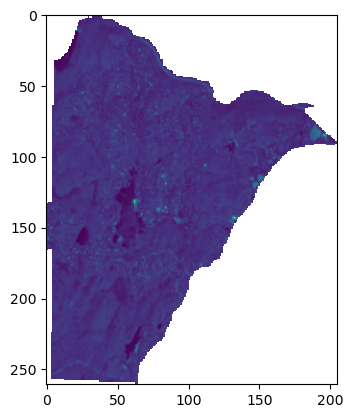

In [11]:
import imageio
img = imageio.imread(f'download_landsat_images/34027040702/least_cloudy_clipped_highres.tif')
B2_blue = img[:,:,1]
B3_green = img[:,:,2]
B4_red = img[:,:,3]

print(img.shape)
plt.imshow(B2_blue)

(22, 28, 17)
(22, 37, 17)
(22, 28, 17)
(22, 37, 17)


Text(0.5, 0.98, 'Band 2 (blue)')

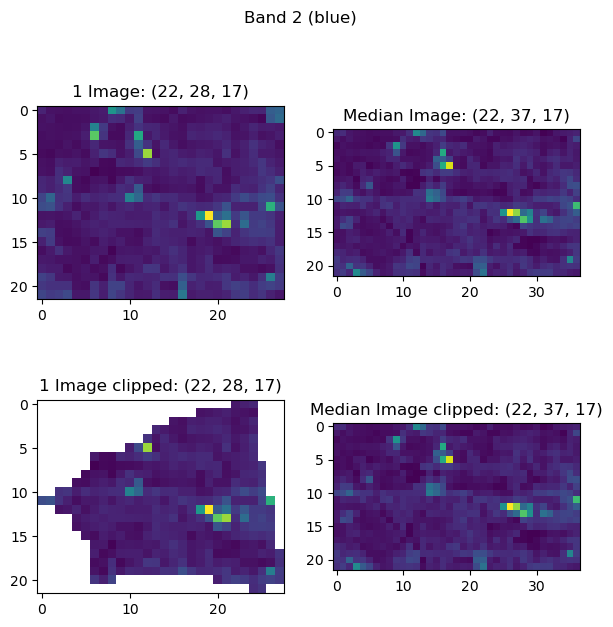

In [129]:
# Load images
import imageio
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

img1 = imageio.imread(f'download_test/ct1.tif')
img2 = imageio.imread(f'download_test/ct2.tif')
img3 = imageio.imread(f'download_test/ct1_clipped.tif')
img4 = imageio.imread(f'download_test/ct2_clipped.tif')

for ax, img, title in zip(axs.flatten(), [img1, img2, img3, img4], 
                          ['1 Image', 'Median Image', '1 Image clipped', 'Median Image clipped']):
    B2_blue = img[:,:,1]
    B3_green = img[:,:,2]
    B4_red = img[:,:,3]

    print(img.shape)
    ax.imshow(B2_blue)
    ax.set_title(f'{title}: {img.shape}')
plt.suptitle('Band 2 (blue)', fontsize=(12))